In [ ]:
! pip install torchmeta

     |████████████████████████████████| 181 kB 8.1 MB/s 
     |████████████████████████████████| 804.1 MB 2.6 kB/s 
     |████████████████████████████████| 17.4 MB 247 kB/s 
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8219 sha256=daab71136f2504665991db63a20f189034e60d3172fca053ceeb2fca1773374e
  Stored in directory: /root/.cache/pip/wheels/73/2b/f6/26e9f84153c25050fe7c09e88f8e32a6be3c7034a38c418319
Successfully built ordered-set
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency co

In [ ]:
import easydict
import matplotlib.pyplot as plt
from torchmeta.datasets.helpers import omniglot
from torchmeta.utils.data import BatchMetaDataLoader

In [ ]:
def get_dataloader(args):
    train_dataset = omniglot(
        args.folder,
        shots=args.num_shots,
        # test_shots=1, # default = shots
        ways=args.num_ways,
        shuffle=True,
        meta_train=True,
        download=args.download,
    )
    train_dataloader = BatchMetaDataLoader(
        train_dataset, batch_size=args.batch_size, shuffle=True, num_workers=1
    )

    test_dataset = omniglot(
        args.folder,
        shots=args.num_shots,
        # test_shots=1, # default = shots
        ways=args.num_ways,
        shuffle=True,
        meta_test=True,
        download=args.download,
    )
    test_dataloader = BatchMetaDataLoader(
        test_dataset, batch_size=args.batch_size, shuffle=True, num_workers=1
    )

    val_dataset = omniglot(
        args.folder,
        shots=args.num_shots,
        # test_shots=1, # default = shots
        ways=args.num_ways,
        shuffle=True,
        meta_val=True,
        download=args.download,
    )
    val_dataloader = BatchMetaDataLoader(
        val_dataset, batch_size=args.batch_size, shuffle=True, num_workers=1
    )

    return train_dataloader, test_dataloader, val_dataloader

In [ ]:
import warnings

warnings.filterwarnings(action="ignore")

args = easydict.EasyDict(
    {
        "folder": "dataset",
        "download": True,
        "num_shots": 2,
        "num_ways": 5,
        "batch_size": 3,
        "num_batches_train": 6000,
        "num_batches_test": 2000,
        "num_batches_val": 100,
        "device": "cpu",  # 'cuda'
    }
)

train_dataloader, test_dataloader, val_dataloader = get_dataloader(args)

In [ ]:
for batch_idx, batch in enumerate(train_dataloader):
    if batch_idx >= args.num_batches_train:
        break

    support_xs = batch["train"][0].to(device=args.device)
    support_ys = batch["train"][1].to(device=args.device)
    query_xs = batch["test"][0].to(device=args.device)
    query_ys = batch["test"][1].to(device=args.device)

    print("support_x shape :", support_xs.shape)
    print("support_y shape :", support_ys.shape)
    print("query_x shape   :", query_xs.shape)
    print("query_y shape   :", query_ys.shape)

    break

support_x shape : torch.Size([3, 10, 1, 28, 28])
support_y shape : torch.Size([3, 10])
query_x shape   : torch.Size([3, 10, 1, 28, 28])
query_y shape   : torch.Size([3, 10])


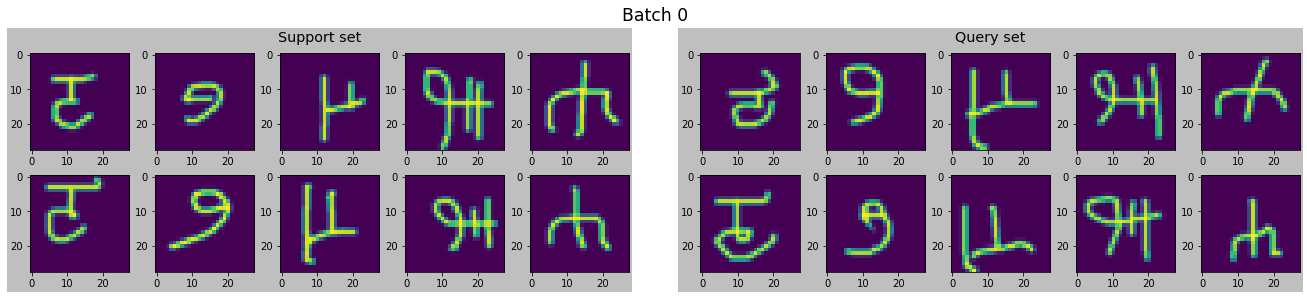

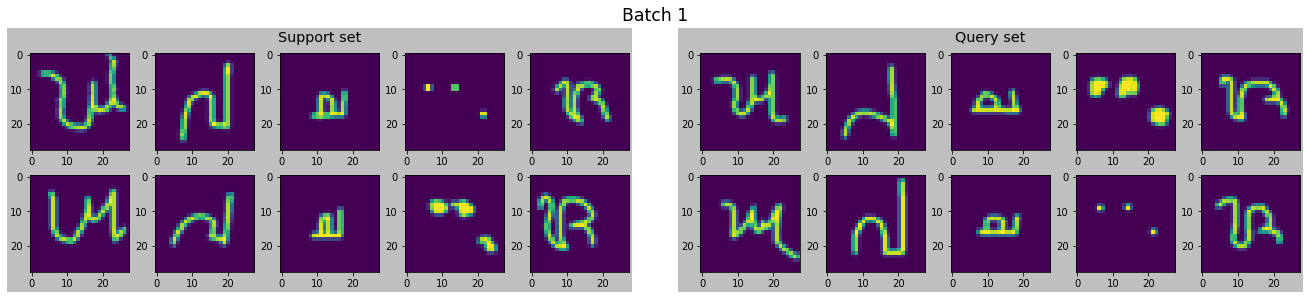

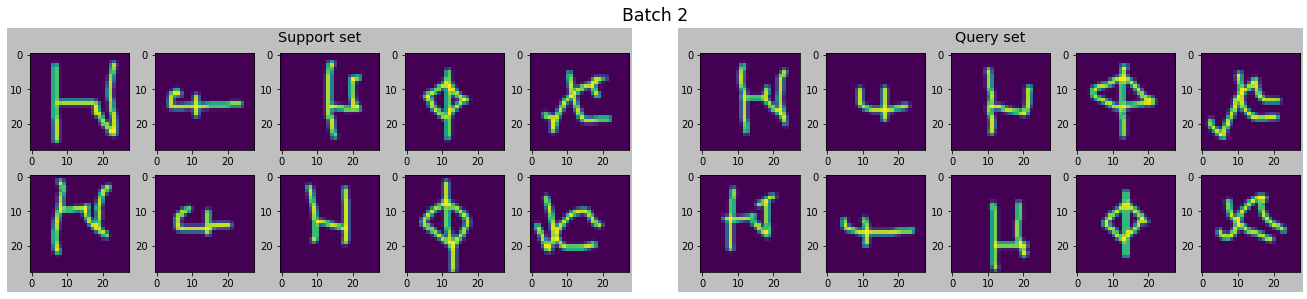

In [ ]:
for b in range(args.batch_size):
    fig = plt.figure(constrained_layout=True, figsize=(18, 4))
    subfigs = fig.subfigures(1, 2, wspace=0.07)

    subfigs[0].set_facecolor("0.75")
    subfigs[0].suptitle("Support set", fontsize="x-large")
    support_axs = subfigs.flat[0].subplots(nrows=2, ncols=5)
    for i, ax in enumerate(support_axs.T.flatten()):
        ax.imshow(support_xs[b][i].permute(1, 2, 0).squeeze(), aspect="auto")

    subfigs[1].set_facecolor("0.75")
    subfigs[1].suptitle("Query set", fontsize="x-large")
    query_axes = subfigs.flat[1].subplots(nrows=2, ncols=5)
    for i, ax in enumerate(query_axes.T.flatten()):
        ax.imshow(query_xs[b][i].permute(1, 2, 0).squeeze(), aspect="auto")

    fig.suptitle("Batch " + str(b), fontsize="xx-large")

    plt.show()